# Análise de gastos da UFCG em relação ao seu gasto

## Importando bibliotecas e preparando dados

In [26]:
# Importações
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
orcamento_completo = pd.read_csv('../consulta_siop_orcamento_ufcg.csv')
orcamento_objetivo = orcamento_completo.iloc[:, 18:]
orcamento_objetivo['ano'] = orcamento_completo['ano']
orcamento_objetivo

,objetivo,projeto_de_lei,dotacao_inicial,dotacao_atual,empenhado,liquidado,pago,ano
0,[valor não detalhado],0,7.686.431,14.586.431,0,0,0,2012
1,[valor não detalhado],0,22.956.997,22.956.997,0,0,0,2012
2,[valor não detalhado],0,38.666.570,38.666.570,0,0,0,2012
3,[valor não detalhado],21.584.508,0,0,0,0,0,2012
4,[valor não detalhado],38.666.570,0,0,0,0,0,2012
...,...,...,...,...,...,...,...,...
4958,[valor não detalhado],0,13.000,13.000,0,0,0,2023
4959,[valor não detalhado],13.000,0,0,0,0,0,2023
4960,[valor não detalhado],0,68.000,68.000,0,0,0,2023
4961,[valor não detalhado],68.000,0,0,0,0,0,2023


## Tratando os dados

In [28]:
objetivo_copia: pd.DataFrame = orcamento_objetivo.copy(deep=True)

for coluna in objetivo_copia.columns[1:-1]:
    objetivo_copia[coluna] = objetivo_copia[coluna].map(lambda value: value.replace(".",""))
    objetivo_copia[coluna] = objetivo_copia[coluna].astype('int64')

objetivo_copia


,objetivo,projeto_de_lei,dotacao_inicial,dotacao_atual,empenhado,liquidado,pago,ano
0,[valor não detalhado],0,7686431,14586431,0,0,0,2012
1,[valor não detalhado],0,22956997,22956997,0,0,0,2012
2,[valor não detalhado],0,38666570,38666570,0,0,0,2012
3,[valor não detalhado],21584508,0,0,0,0,0,2012
4,[valor não detalhado],38666570,0,0,0,0,0,2012
...,...,...,...,...,...,...,...,...
4958,[valor não detalhado],0,13000,13000,0,0,0,2023
4959,[valor não detalhado],13000,0,0,0,0,0,2023
4960,[valor não detalhado],0,68000,68000,0,0,0,2023
4961,[valor não detalhado],68000,0,0,0,0,0,2023


In [29]:
monetario = [
    'projeto_de_lei', 
    'dotacao_inicial', 
    'dotacao_atual', 
    'empenhado', 
    'liquidado', 
    'pago'
]

alvo = [
    'objetivo',
    'ano'
]

In [30]:
objetivo_informacoes = objetivo_copia.groupby(alvo)[monetario].agg([
    sum, len, max, min, lambda col_monetaria: col_monetaria.mean()
])

objetivo_informacoes.rename(columns={'<lambda_0>':'media', 
                                     'sum': 'soma', 
                                     'len': 'quantidade de gastos', 
                                     'min': 'minimo',
                                     'max': 'maximo'}, inplace=True)
objetivo_informacoes

projeto_de_lei  \
                                                                  soma   
objetivo                                           ano                   
0582 - Expandir, interiorizar, democratizar e q... 2014        1598204   
                                                   2015        1511577   
0597 - Promover, em articulação com os sistemas... 2012         229892   
                                                   2013        1360240   
                                                   2014        1704881   
                                                   2015         642701   
0803 - Apoiar a formação de pessoal qualificado... 2012         461369   
                                                   2013        2324165   
                                                   2014        2011276   
                                                   2015        1252583   
0841 - Ampliar o acesso à educação superior com... 2012       74484103   
                                                   2013       84182086   
                                                   2014       93645202   
                                                   2015      107301602   
1009 - Ampliar o acesso à educação profissional... 2016        1903044   
                                                   2017        1541230   
                                                   2018        1229204   
                                                   2019        1659645   
1010 - Ampliar o acesso à educação superior de ... 2016      110671031   
                                                   2017      102848784   
                                                   2018       87532645   
                                                   2019       89416257   
1204 - Ampliar o acesso à educação profissional... 2020         982507   
                                                   2021         959417   
                                                   2022        1704567   
                                                   2023        1661362   
1237 - Fomentar a formação de pessoal qualifica... 2020       55953608   
                                                   2021       32587658   
                                                   2022       77579609   
                                                   2023       72887646   
[valor não detalhado]                              2012      304127438   
                                                   2013      315468518   
                                                   2014      381347718   
                                                   2015      422531400   
                                                   2016      478443148   
                                                   2017      542525837   
                                                   2018      564164581   
                                                   2019      591671792   
                                                   2020      578404832   
                                                   2021      366415747   
                                                   2022      664228115   
                                                   2023      679352320   

                                                                              \
                                                        quantidade de gastos   
objetivo                                           ano                         
0582 - Expandir, interiorizar, democratizar e q... 2014                   40   
                                                   2015                   41   
0597 - Promover, em articulação com os sistemas... 2012                    4   
                                                   2013                   16   
                                                   2014                    8   
                                                   2015                    7   
0803 

## Interpretando os dados

A tabela acima tem todas as informações relacionadas ao objetivo e o ano em que esse objetivo ocorreu, mostrando a soma dos gastos, o máximo, mínimo, a quantidade de gastos e a média de gastos.

### Interpretando os índices



In [52]:
indices = objetivo_informacoes.reset_index().iloc[:,0]
objetivos = indices.unique()
objetivos

array(['0582 - Expandir, interiorizar, democratizar e qualificar a oferta...',
       '0597 - Promover, em articulação com os sistemas de ensino estaduais...',
       '0803 - Apoiar a formação de pessoal qualificado em nível superior...',
       '0841 - Ampliar o acesso à educação superior com condições de...',
       '1009 - Ampliar o acesso à educação profissional e tecnológica de...',
       '1010 - Ampliar o acesso à educação superior de qualidade, na...',
       '1204 - Ampliar o acesso à educação profissional e tecnológica, em...',
       '1237 - Fomentar a formação de pessoal qualificado, fortalecendo a...',
       '[valor não detalhado]'], dtype=object)

In [53]:
ensino_superior = list()
formacao_profissional = list()

for objetivo in objetivos:
    if 'superior' in objetivo or 'oferta' in objetivo or 'ensino' in objetivo:
        ensino_superior.append(objetivo)
    elif 'profissional' in objetivo or 'qualificado' in objetivo:
        ensino_superior.append(objetivo)
    else: continue

ensino_superior + formacao_profissional

['0582 - Expandir, interiorizar, democratizar e qualificar a oferta...',
 '0597 - Promover, em articulação com os sistemas de ensino estaduais...',
 '0803 - Apoiar a formação de pessoal qualificado em nível superior...',
 '0841 - Ampliar o acesso à educação superior com condições de...',
 '1009 - Ampliar o acesso à educação profissional e tecnológica de...',
 '1010 - Ampliar o acesso à educação superior de qualidade, na...',
 '1204 - Ampliar o acesso à educação profissional e tecnológica, em...',
 '1237 - Fomentar a formação de pessoal qualificado, fortalecendo a...']

Vamos identificar cada Objetivo como seu respectivo ID, ou seja, o número a esquerda. Nosso objetivo será encontrar os anos em que cada objetivo foram registrados, identificando assim um possível padrão de gastos e o histórico. 

* 0582 - 2014 e 2015;
* 0597 - 2012, 2013, 2014 e 2015;
* 0803 - 2012, 2013, 2014 e 2015;
* 0841 - 2012, 2013, 2014 e 2015;
* 1009 - 2016, 2017, 2018 e 2019;
* 1010 - 2016, 2017, 2018 e 2019;
* 1204 - 2020, 2021, 2022 e 2023;
* 1237 - 2020, 2021, 2022 e 2023;
* [valor não detalhado] - 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023


### Conclusões

1. Não detalhar o valor é algo extremamente comum em conjuntos de dados, visto que eles ocorrem quando não é pensado ou por falha na obtenção da tabela. Com isso, esse valor não detalhado estar presente em todos os anos é o esperado; 
2. Os objetivos se repetem, justamente por serem os mesmos mas com nomeclaturas diferentes. Logo, só existem dois objetivos principais a serem vistos em cada ano: investimento no ensino superior e na formação profissional, existindo variações da descrição a partir da natureza mais específica do investimento.

### Interpretando os gastos

#### Ensino Superior X Formação profissional

In [67]:
objetivo_geral = objetivo_copia.copy(deep=True)
objetivo_geral.drop(objetivo_geral[objetivo_geral.objetivo == '[valor não detalhado]'].index, inplace=True)
objetivo_geral

,objetivo,projeto_de_lei,dotacao_inicial,dotacao_atual,empenhado,liquidado,pago,ano
32,"0597 - Promover, em articulação com os sistema...",0,227392,227392,0,0,0,2012
33,"0597 - Promover, em articulação com os sistema...",227392,0,0,0,0,0,2012
34,"0597 - Promover, em articulação com os sistema...",0,2500,2500,0,0,0,2012
35,"0597 - Promover, em articulação com os sistema...",2500,0,0,0,0,0,2012
36,0803 - Apoiar a formação de pessoal qualificad...,0,375208,375208,0,0,0,2012
...,...,...,...,...,...,...,...,...
4953,1237 - Fomentar a formação de pessoal qualific...,0,0,0,2071551,2068767,2068767,2023
4954,1237 - Fomentar a formação de pessoal qualific...,0,1500000,0,0,0,0,2023
4955,1237 - Fomentar a formação de pessoal qualific...,0,0,4087661,0,0,0,2023
4956,1237 - Fomentar a formação de pessoal qualific...,0,3400000,3400000,0,0,0,2023


In [68]:
objetivo_geral.objetivo.replace('0582 - Expandir, interiorizar, democratizar e qualificar a oferta...', 'ensino_superior', inplace=True)
objetivo_geral.objetivo.replace('0597 - Promover, em articulação com os sistemas de ensino estaduais...', 'ensino_superior', inplace=True)
objetivo_geral.objetivo.replace('0803 - Apoiar a formação de pessoal qualificado em nível superior...', 'ensino_superior', inplace=True)
objetivo_geral.objetivo.replace('0841 - Ampliar o acesso à educação superior com condições de...', 'ensino_superior', inplace=True)
objetivo_geral.objetivo.replace('1009 - Ampliar o acesso à educação profissional e tecnológica de...', 'formacao_profissional', inplace=True)
objetivo_geral.objetivo.replace('1010 - Ampliar o acesso à educação superior de qualidade, na...', 'ensino_superior', inplace=True)
objetivo_geral.objetivo.replace('1204 - Ampliar o acesso à educação profissional e tecnológica, em...', 'formacao_profissional', inplace=True)
objetivo_geral.objetivo.replace('1237 - Fomentar a formação de pessoal qualificado, fortalecendo a...', 'ensino_superior', inplace=True)
objetivo_geral.objetivo.unique()

array(['ensino_superior', 'formacao_profissional'], dtype=object)

In [69]:
colunas_alvo_soma = [
    ('projeto_de_lei','soma'),
    ('dotacao_inicial','soma'),
    ('dotacao_atual','soma'),
    ('empenhado','soma'),
    ('liquidado','soma'),
    ('pago','soma')
]

In [70]:
objetivo_geral_comparacoes = objetivo_geral.groupby(alvo)[monetario].agg([
    sum, len, max, min, lambda col_monetaria: col_monetaria.mean()
])

objetivo_geral_comparacoes.rename(columns={'<lambda_0>':'media', 
                                     'sum': 'soma', 
                                     'len': 'quantidade de gastos', 
                                     'min': 'minimo',
                                     'max': 'maximo'}, inplace=True)

In [71]:
objetivo_geral_comparacoes

projeto_de_lei                                 \
                                     soma quantidade de gastos    maximo   
objetivo              ano                                                  
ensino_superior       2012       75175364                  306  16264609   
                      2013       87866491                  428  14303080   
                      2014       98959563                  345  19500000   
                      2015      110708463                  370  25000000   
                      2016      110671031                  259  22401000   
                      2017      102848784                  223  18992524   
                      2018       87532645                  212  30000000   
                      2019       89416257                  234  28000000   
                      2020       55953608                  207  16576000   
                      2021       32587658                  172   6464492   
                      2022       77579609                  220  20340000   
                      2023       72887646                  135  18010819   
formacao_profissional 2016        1903044                   51    385000   
                      2017        1541230                   53    355000   
                      2018        1229204                   40    398000   
                      2019        1659645                   46    398000   
                      2020         982507                   33    235616   
                      2021         959417                   46    500000   
                      2022        1704567                   36    550864   
                      2023        1661362                   21    494254   

                                                 dotacao_inicial  \
                           minimo          media            soma   
objetivo              ano                                          
ensino_superior       2012      0  245671.124183        79875364   
                      2013      0  205295.539720        90266491   
                      2014      0  286839.313043       101059563   
                      2015      0  299212.062162       112508463   
                      2016      0  427301.277992       127831193   
                      2017      0  461205.309417       108998784   
                      2018      0  412889.834906        90528501   
                      2019      0  382120.756410       117666663   
                      2020      0  270307.285024        55860109   
                      2021      0  189463.127907        30599759   
                      2022      0  352634.586364        86553836   
                      2023      0  539908.488889        75392815   
formacao_profissional 2016      0   37314.588235         1903044   
                      2017      0   29079.811321         1541230   
                      2018      0   30730.100000         1229204   
                      2019      0   36079.239130         1659645   
                      2020      0   29772.939394          950306   
                      2021      0   20856.891304          901928   
                      2022      0   47349.083333         1704567   
                      2023      0   79112.476190         1661362   

                                                                  \
                           quantidade de gastos    maximo minimo   
objetivo              ano                                          
ensino_superior       2012                  306  31117535      0   
                      2013                  428  34211912      0   
                      2014                  345  41014888      0   
                      2015                  370  48458138      0   
                      2016                  259  51934094      0   
                      2017                  223  49988767      0   
                      2018                  212  56748411      0   
                      2019       

In [103]:
objetivo_ensino_superior = objetivo_geral_comparacoes.iloc[:12]
objetivo_ensino_superior

projeto_de_lei                                        \
                               soma quantidade de gastos    maximo minimo   
objetivo        ano                                                         
ensino_superior 2012       75175364                  306  16264609      0   
                2013       87866491                  428  14303080      0   
                2014       98959563                  345  19500000      0   
                2015      110708463                  370  25000000      0   
                2016      110671031                  259  22401000      0   
                2017      102848784                  223  18992524      0   
                2018       87532645                  212  30000000      0   
                2019       89416257                  234  28000000      0   
                2020       55953608                  207  16576000      0   
                2021       32587658                  172   6464492      0   
                2022       77579609                  220  20340000      0   
                2023       72887646                  135  18010819      0   

                                    dotacao_inicial                       \
                              media            soma quantidade de gastos   
objetivo        ano                                                        
ensino_superior 2012  245671.124183        79875364                  306   
                2013  205295.539720        90266491                  428   
                2014  286839.313043       101059563                  345   
                2015  299212.062162       112508463                  370   
                2016  427301.277992       127831193                  259   
                2017  461205.309417       108998784                  223   
                2018  412889.834906        90528501                  212   
                2019  382120.756410       117666663                  234   
                2020  270307.285024        55860109                  207   
                2021  189463.127907        30599759                  172   
                2022  352634.586364        86553836                  220   
                2023  539908.488889        75392815                  135   

                                                      ... liquidado  \
                        maximo minimo          media  ...      soma   
objetivo        ano                                   ...             
ensino_superior 2012  31117535      0  261030.601307  ...  49843157   
                2013  34211912      0  210903.016355  ...  63322977   
                2014  41014888      0  292926.269565  ...  64656158   
                2015  48458138      0  304076.927027  ...  70779183   
                2016  51934094      0  493556.729730  ...  69885656   
                2017  49988767      0  488783.784753  ...  60327327   
                2018  56748411      0  427021.231132  ...  54572959   
                2019  56744247      0  502848.987179  ...  50076838   
                2020  32487620      0  269855.599034  ...  43030557   
                2021  16757456      0  177905.575581  ...  44797577   
                2022  49268772      0  393426.527273  ...  60578850   
                2023  42782598      0  558465.296296  ...  22670810   

                                                                           \
                     quantidade de gastos    maximo minimo          media   
objetivo        ano                                                         
ensino_superior 2012                  306   8215761      0  162886.133987   
                2013                  428  14309592      0  147950.880841   
                2014                  345  14972325      0  187409.153623   
                2015                  370  18872392      0  191295.089189   
                2016                  259  17705662      0  269828.787645   
                2017                  223 

In [104]:
objetivo_ensino_superior = objetivo_ensino_superior.reset_index().iloc[:,1:]
objetivo_ensino_superior.index = objetivo_ensino_superior.iloc[:,0]
objetivo_ensino_superior = objetivo_ensino_superior.iloc[:,1:]
objetivo_ensino_superior.index.rename('ano', inplace=True)
objetivo_ensino_superior

projeto_de_lei                                                       \
               soma quantidade de gastos    maximo minimo          media   
ano                                                                        
2012       75175364                  306  16264609      0  245671.124183   
2013       87866491                  428  14303080      0  205295.539720   
2014       98959563                  345  19500000      0  286839.313043   
2015      110708463                  370  25000000      0  299212.062162   
2016      110671031                  259  22401000      0  427301.277992   
2017      102848784                  223  18992524      0  461205.309417   
2018       87532645                  212  30000000      0  412889.834906   
2019       89416257                  234  28000000      0  382120.756410   
2020       55953608                  207  16576000      0  270307.285024   
2021       32587658                  172   6464492      0  189463.127907   
2022       77579609                  220  20340000      0  352634.586364   
2023       72887646                  135  18010819      0  539908.488889   

     dotacao_inicial                                                       \
                soma quantidade de gastos    maximo minimo          media   
ano                                                                         
2012        79875364                  306  31117535      0  261030.601307   
2013        90266491                  428  34211912      0  210903.016355   
2014       101059563                  345  41014888      0  292926.269565   
2015       112508463                  370  48458138      0  304076.927027   
2016       127831193                  259  51934094      0  493556.729730   
2017       108998784                  223  49988767      0  488783.784753   
2018        90528501                  212  56748411      0  427021.231132   
2019       117666663                  234  56744247      0  502848.987179   
2020        55860109                  207  32487620      0  269855.599034   
2021        30599759                  172  16757456      0  177905.575581   
2022        86553836                  220  49268772      0  393426.527273   
2023        75392815                  135  42782598      0  558465.296296   

      ... liquidado                                                       \
      ...      soma quantidade de gastos    maximo minimo          media   
ano   ...                                                                  
2012  ...  49843157                  306   8215761      0  162886.133987   
2013  ...  63322977                  428  14309592      0  147950.880841   
2014  ...  64656158                  345  14972325      0  187409.153623   
2015  ...  70779183                  370  18872392      0  191295.089189   
2016  ...  69885656                  259  17705662      0  269828.787645   
2017  ...  60327327                  223  16362275      0  270526.130045   
2018  ...  54572959                  212  15389881      0  257419.617925   
2019  ...  50076838                  234  10991901      0  214003.581197   
2020  ...  43030557                  207   7436508      0  207877.086957   
2021  ...  44797577                  172  12554591      0  260451.029070   
2022  ...  60578850                  220  17384365      0  275358.409091   
2023  ...  22670810                  135   6205710      0  167931.925926   

          pago                                                       
          soma quantidade de gastos    maximo minimo          media  
ano                                                                  
2012  48309918                  306   8011360      0  157875.549020  
2013  60764073                  428  14240406      0  141972.133178  
2014  63624986                  345  14844818      0  184420.249275  
2015  64424611                  370  18162988      0  174120.570270  
2016  69016877                  259  17705662      0  266474.428571  
2017  5

<Axes: xlabel='ano'>

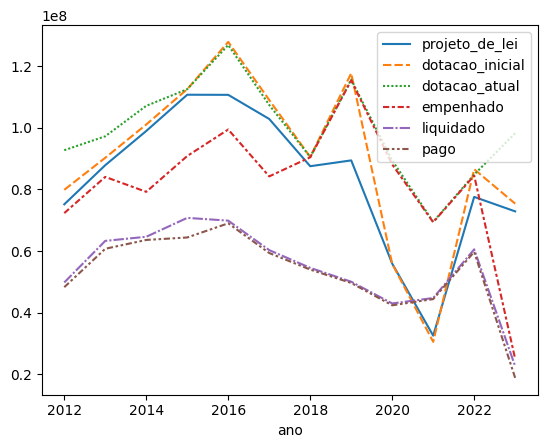

In [105]:
sns.lineplot(objetivo_ensino_superior[colunas_alvo_soma])

In [75]:
objetivo_formacao_profissional = objetivo_geral_comparacoes.iloc[12:]
objetivo_formacao_profissional

projeto_de_lei                                      \
                                     soma quantidade de gastos  maximo minimo   
objetivo              ano                                                       
formacao_profissional 2016        1903044                   51  385000      0   
                      2017        1541230                   53  355000      0   
                      2018        1229204                   40  398000      0   
                      2019        1659645                   46  398000      0   
                      2020         982507                   33  235616      0   
                      2021         959417                   46  500000      0   
                      2022        1704567                   36  550864      0   
                      2023        1661362                   21  494254      0   

                                         dotacao_inicial                       \
                                   media            soma quantidade de gastos   
objetivo              ano                                                       
formacao_profissional 2016  37314.588235         1903044                   51   
                      2017  29079.811321         1541230                   53   
                      2018  30730.100000         1229204                   40   
                      2019  36079.239130         1659645                   46   
                      2020  29772.939394          950306                   33   
                      2021  20856.891304          901928                   46   
                      2022  47349.083333         1704567                   36   
                      2023  79112.476190         1661362                   21   

                                                          ... liquidado  \
                             maximo minimo         media  ...      soma   
objetivo              ano                                 ...             
formacao_profissional 2016   843788      0  37314.588235  ...    778554   
                      2017   795145      0  29079.811321  ...    517989   
                      2018   905204      0  30730.100000  ...   1009925   
                      2019  1295595      0  36079.239130  ...    260009   
                      2020   741762      0  28797.151515  ...    433289   
                      2021   470000      0  19607.130435  ...    362610   
                      2022   798000      0  47349.083333  ...    923591   
                      2023   741381      0  79112.476190  ...     25648   

                                                                              \
                           quantidade de gastos  maximo minimo         media   
objetivo              ano                                                      
formacao_profissional 2016                   51  217712      0  15265.764706   
                      2017                   53   99897      0   9773.377358   
                      2018                   40  266170      0  25248.125000   
                      2019                   46   33418      0   5652.369565   
                      2020                   33  203592      0  13129.969697   
                      2021                   46  337400      0   7882.826087   
                      2022                   36  375176      0  25655.305556   
                      2023                   21    7260      0   1221.333333   

                              pago                                      \
                              soma quantidade de gastos  maximo minimo   
objetivo              ano                                                
formacao_profissional 2016  695738                   51  217712      0   
                      2017  498120                   53   99143      0   
                      2018  736924                   40  266170      0   
                      2019  260009                   46   33418      0   
                  

In [107]:
objetivo_formacao_profissional = objetivo_formacao_profissional.reset_index().iloc[:,1:]
objetivo_formacao_profissional.index = objetivo_formacao_profissional.iloc[:,0]
objetivo_formacao_profissional = objetivo_formacao_profissional.iloc[:,1:]
objetivo_formacao_profissional.index.rename('ano', inplace=True)
objetivo_formacao_profissional

projeto_de_lei                                                    \
               soma quantidade de gastos  maximo minimo         media   
ano                                                                     
2016        1903044                   51  385000      0  37314.588235   
2017        1541230                   53  355000      0  29079.811321   
2018        1229204                   40  398000      0  30730.100000   
2019        1659645                   46  398000      0  36079.239130   
2020         982507                   33  235616      0  29772.939394   
2021         959417                   46  500000      0  20856.891304   
2022        1704567                   36  550864      0  47349.083333   
2023        1661362                   21  494254      0  79112.476190   

     dotacao_inicial                                                     ...  \
                soma quantidade de gastos   maximo minimo         media  ...   
ano                                                                      ...   
2016         1903044                   51   843788      0  37314.588235  ...   
2017         1541230                   53   795145      0  29079.811321  ...   
2018         1229204                   40   905204      0  30730.100000  ...   
2019         1659645                   46  1295595      0  36079.239130  ...   
2020          950306                   33   741762      0  28797.151515  ...   
2021          901928                   46   470000      0  19607.130435  ...   
2022         1704567                   36   798000      0  47349.083333  ...   
2023         1661362                   21   741381      0  79112.476190  ...   

     liquidado                                                      pago  \
          soma quantidade de gastos  maximo minimo         media    soma   
ano                                                                        
2016    778554                   51  217712      0  15265.764706  695738   
2017    517989                   53   99897      0   9773.377358  498120   
2018   1009925                   40  266170      0  25248.125000  736924   
2019    260009                   46   33418      0   5652.369565  260009   
2020    433289                   33  203592      0  13129.969697  433289   
2021    362610                   46  337400      0   7882.826087  362610   
2022    923591                   36  375176      0  25655.305556  882139   
2023     25648                   21    7260      0   1221.333333   25648   

                                                        
     quantidade de gastos  maximo minimo         media  
ano                                                     
2016                   51  217712      0  13641.921569  
2017                   53   99143      0   9398.490566  
2018                   40  266170      0  18423.100000  
2019                   46   33418      0   5652.369565  
2020                   33  203592      0  13129.969697  
2021                   46  337400      0   7882.826087  
2022                   36  341750      0  24503.861111  
2023                   21    7260      0   1221.333333  

[8 rows x 30 columns]

<Axes: xlabel='ano'>

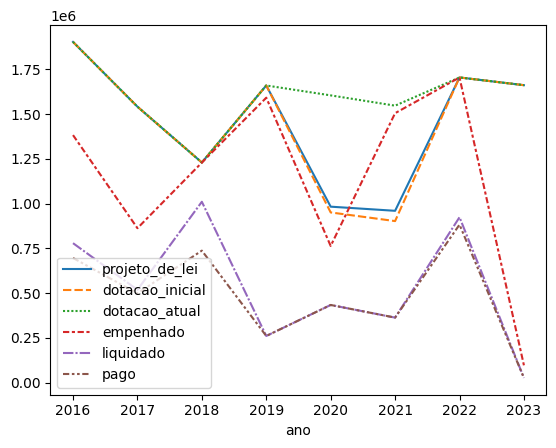

In [108]:
sns.lineplot(objetivo_formacao_profissional[colunas_alvo_soma])

#### Analisando objetivos específicos

In [39]:
# Separando cada objetivo em um dataFrame próprio

objetivo_0582 = objetivo_informacoes.reset_index().iloc[:2,1:]
objetivo_0582.index = objetivo_0582.iloc[:,0]
objetivo_0582.drop(columns=['ano'], inplace=True)
objetivo_0597 = objetivo_informacoes.reset_index().iloc[2:6,1:]
objetivo_0597.index = objetivo_0597.iloc[:,0]
objetivo_0597.drop(columns=['ano'], inplace=True)
objetivo_0803  = objetivo_informacoes.reset_index().iloc[6:10,1:]
objetivo_0803.index = objetivo_0803.iloc[:,0]
objetivo_0803.drop(columns=['ano'], inplace=True)
objetivo_0841 = objetivo_informacoes.reset_index().iloc[10:14,1:]
objetivo_0841.index = objetivo_0841.iloc[:,0]
objetivo_0841.drop(columns=['ano'], inplace=True)
objetivo_1009  = objetivo_informacoes.reset_index().iloc[14:18,1:]
objetivo_1009.index = objetivo_1009.iloc[:,0]
objetivo_1009.drop(columns=['ano'], inplace=True)
objetivo_1010  = objetivo_informacoes.reset_index().iloc[18:22,1:]
objetivo_1010.index = objetivo_1010.iloc[:,0]
objetivo_1010.drop(columns=['ano'], inplace=True)
objetivo_1204 = objetivo_informacoes.reset_index().iloc[22:26,1:]
objetivo_1204.index = objetivo_1204.iloc[:,0]
objetivo_1204.drop(columns=['ano'], inplace=True)
objetivo_1237 = objetivo_informacoes.reset_index().iloc[26:30,1:]
objetivo_1237.index = objetivo_1237.iloc[:,0]
objetivo_1237.drop(columns=['ano'], inplace=True)
objetivo_nao_detalhado = objetivo_informacoes.reset_index().iloc[30:,1:]
objetivo_nao_detalhado.index = objetivo_nao_detalhado.iloc[:,0]
objetivo_nao_detalhado.drop(columns=['ano'], inplace=True)


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_27108\1602861820.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  objetivo_0582.drop(columns=['ano'], inplace=True)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_27108\1602861820.py:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  objetivo_0597.drop(columns=['ano'], inplace=True)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_27108\1602861820.py:11: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  objetivo_0803.drop(columns=['ano'], inplace=True)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_27108\1602861820.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  objetivo_0841.drop(columns=['ano'], inplace=True)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_27108\1602861820.py:17: Perf

<Axes: xlabel="('ano', '')">

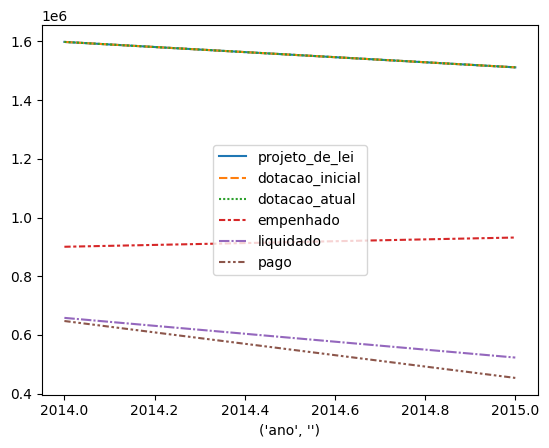

In [40]:
sns.lineplot(objetivo_0582[colunas_alvo_soma])

<Axes: xlabel="('ano', '')">

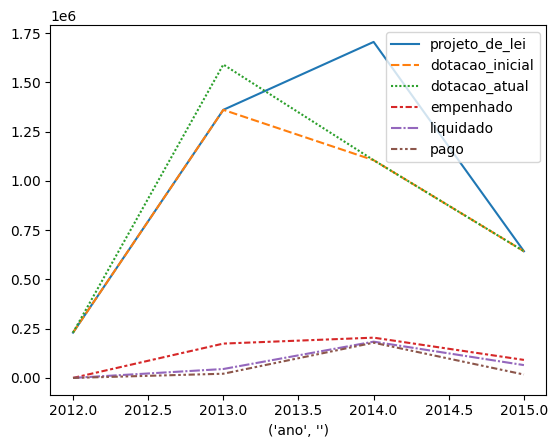

In [41]:
sns.lineplot(objetivo_0597[colunas_alvo_soma])

<Axes: xlabel="('ano', '')">

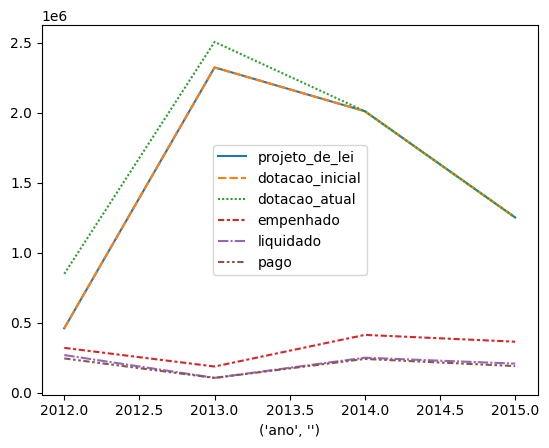

In [42]:
sns.lineplot(objetivo_0803[colunas_alvo_soma])

<Axes: xlabel="('ano', '')">

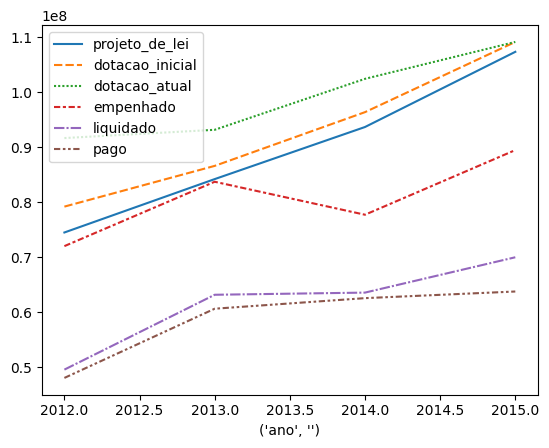

In [43]:
sns.lineplot(objetivo_0841[colunas_alvo_soma])

<Axes: xlabel="('ano', '')">

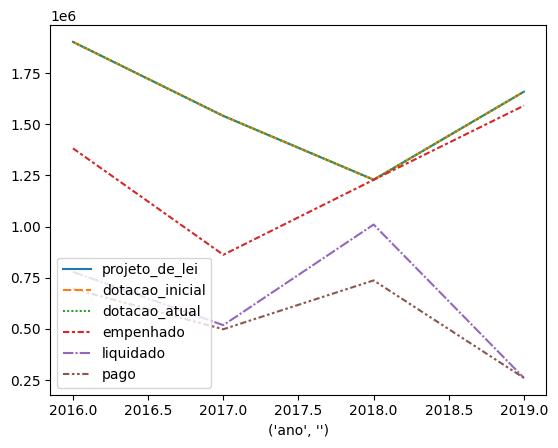

In [44]:
sns.lineplot(objetivo_1009[colunas_alvo_soma])

<Axes: xlabel="('ano', '')">

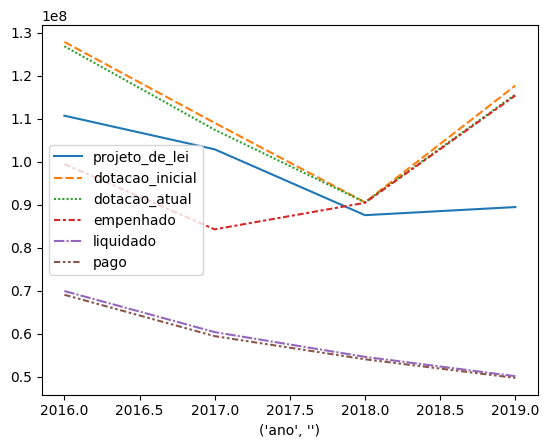

In [45]:
sns.lineplot(objetivo_1010[colunas_alvo_soma])

<Axes: xlabel="('ano', '')">

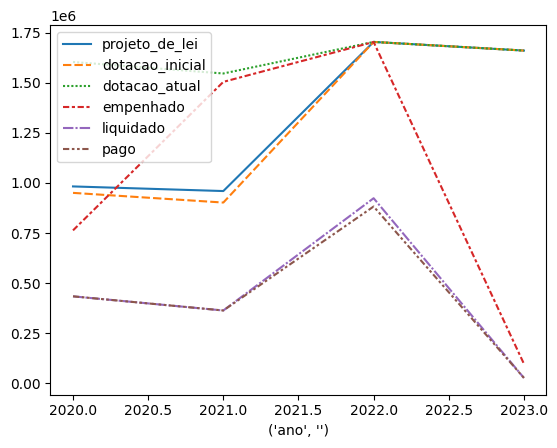

In [46]:
sns.lineplot(objetivo_1204[colunas_alvo_soma])

<Axes: xlabel="('ano', '')">

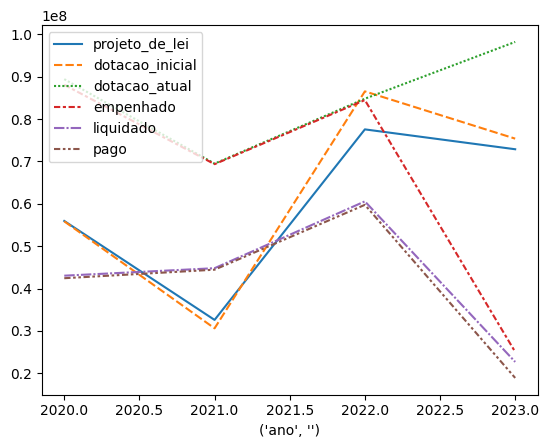

In [47]:
sns.lineplot(objetivo_1237[colunas_alvo_soma])

<Axes: xlabel="('ano', '')">

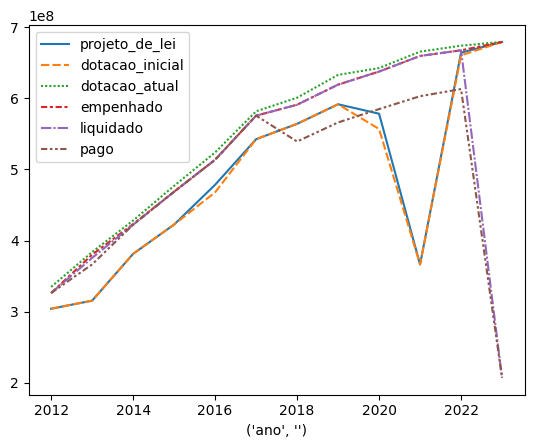

In [48]:
sns.lineplot(objetivo_nao_detalhado[colunas_alvo_soma])